============================Data Manipulation====================================

In [2]:
# Install PyTorch and related packages
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.9.1%2Bcpu-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.9.0%2Bcpu-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.8.0%2Bcpu-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.7.1%2Bcpu-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.7.0%2Bcpu-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cpu/torchaudio-2.6.0%2Bcpu-cp310-cp310-linux_

In [3]:
import torch

x = torch.arange(12, dtype=torch.float32)
x = x.reshape(3, 4)

In [4]:
x1 = torch.zeros(2, 3, 4, dtype=torch.float32)
x2 = torch.zeros((2, 3, 4), dtype=torch.float32)

x1, x1.allclose(x2)

(tensor([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
 
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]]]),
 True)

In [5]:
print(x1.numel()) #total number of elements in a tensor

24


In [6]:
x1 = torch.randn(3, 4) # standard Gaussian (normal) distribution 
x2 = torch.randn((3,4))
x1, x2

(tensor([[-0.0991, -1.0500,  0.4707,  0.0314],
         [ 0.7967, -0.8625, -0.3932, -1.5073],
         [ 1.1234,  0.2980,  2.3677, -0.8220]]),
 tensor([[-0.0615, -0.1153, -0.9458, -0.1393],
         [-0.6815, -1.1407, -1.4976, -0.1457],
         [ 1.2717, -0.6156, -0.2133,  0.3379]]))

In [7]:
X = torch.Tensor([[1.0, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])
X[2,3]  = 20
X

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 20.]])

In [8]:
X[:2,:] = 20
X

tensor([[20., 20., 20., 20.],
        [20., 20., 20., 20.],
        [ 9., 10., 11., 20.]])

In [9]:
# elementwise operations
X = torch.Tensor([[1.0, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])
Y = torch.ones(3, 4)

torch.exp(X) ,X + Y, X * Y, X / Y, X**Y #exponentiation


(tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
         [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03],
         [8.1031e+03, 2.2026e+04, 5.9874e+04, 1.6275e+05]]),
 tensor([[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]]),
 tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]),
 tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]),
 tensor([[ 1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12.]]))

In [10]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1), X.sum(dim=0) 

# “The dim=i means the operation is applied across the ith dimension, and the size of that dimension may change 
# (increase for concatenation, decrease for reduction). The other dimensions stay the same.”

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]),
 tensor([12., 15., 18., 21.]))

In [11]:
X, X.sum(dim=0), X.sum(dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([12., 15., 18., 21.]),
 tensor([ 6., 22., 38.]))

In [12]:
# 🧠 MEMORY TRICK for dim=0 vs dim=1
# Think of dimensions as DIRECTIONS in your tensor

print("="*60)
print("📚 THE GOLDEN RULE FOR REMEMBERING dim=0 vs dim=1")
print("="*60)

# Create a clear example
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
print("Original tensor X (3 rows × 4 columns):")
print(X)
print(f"Shape: {X.shape}")

print("\n" + "🔍 UNDERSTANDING THE PATTERN:")
print("• dim=0 = ROW dimension (first number in shape)")
print("• dim=1 = COLUMN dimension (second number in shape)")
print("• The dimension you specify gets COLLAPSED/JOINED")

print("\n" + "="*40)
print("TORCH.CAT EXAMPLES:")
print("="*40)

Y = torch.tensor([[100., 200, 300, 400]])  
print(f"\nY to add: {Y.squeeze()} (shape: {Y.shape})")

# dim=0: Add more ROWS (stack vertically)
cat_dim0 = torch.cat((X, Y), dim=0)
print(f"\n🔽 cat(dim=0) - ADDS ROWS (vertical stacking):")
print(cat_dim0)
print(f"Shape: {X.shape} → {cat_dim0.shape} (rows increased!)")

Z = torch.tensor([[100.], [200.], [300.]])  
print(f"\nZ to add: {Z.squeeze()} (shape: {Z.shape})")

# dim=1: Add more COLUMNS (stack horizontally)  
cat_dim1 = torch.cat((X, Z), dim=1)
print(f"\n➡️ cat(dim=1) - ADDS COLUMNS (horizontal stacking):")
print(cat_dim1)
print(f"Shape: {X.shape} → {cat_dim1.shape} (columns increased!)")

📚 THE GOLDEN RULE FOR REMEMBERING dim=0 vs dim=1
Original tensor X (3 rows × 4 columns):
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
Shape: torch.Size([3, 4])

🔍 UNDERSTANDING THE PATTERN:
• dim=0 = ROW dimension (first number in shape)
• dim=1 = COLUMN dimension (second number in shape)
• The dimension you specify gets COLLAPSED/JOINED

TORCH.CAT EXAMPLES:

Y to add: tensor([100., 200., 300., 400.]) (shape: torch.Size([1, 4]))

🔽 cat(dim=0) - ADDS ROWS (vertical stacking):
tensor([[  0.,   1.,   2.,   3.],
        [  4.,   5.,   6.,   7.],
        [  8.,   9.,  10.,  11.],
        [100., 200., 300., 400.]])
Shape: torch.Size([3, 4]) → torch.Size([4, 4]) (rows increased!)

Z to add: tensor([100., 200., 300.]) (shape: torch.Size([3, 1]))

➡️ cat(dim=1) - ADDS COLUMNS (horizontal stacking):
tensor([[  0.,   1.,   2.,   3., 100.],
        [  4.,   5.,   6.,   7., 200.],
        [  8.,   9.,  10.,  11., 300.]])
Shape: torch.Size([3, 4]) → torc

In [13]:
print("\n" + "="*40)
print("TENSOR.SUM EXAMPLES:")
print("="*40)

X = torch.arange(12, dtype=torch.float32).reshape((3,4))
print("\nOriginal tensor X:")
print(X)
print(f"Shape: {X.shape}")

# dim=0: Sum DOWN the rows (collapse row dimension)
sum_dim0 = X.sum(dim=0)
print(f"\n🔽 sum(dim=0) - Sum DOWN the rows (collapse rows):")
print(f"Result: {sum_dim0}")
print(f"Shape: {X.shape} → {sum_dim0.shape} (row dimension collapsed!)")
print("Math: Column 0: 0+4+8=12, Column 1: 1+5+9=15, etc.")

# dim=1: Sum ACROSS the columns (collapse column dimension)
sum_dim1 = X.sum(dim=1)  
print(f"\n➡️ sum(dim=1) - Sum ACROSS the columns (collapse columns):")
print(f"Result: {sum_dim1}")
print(f"Shape: {X.shape} → {sum_dim1.shape} (column dimension collapsed!)")
print("Math: Row 0: 0+1+2+3=6, Row 1: 4+5+6+7=22, Row 2: 8+9+10+11=38")

print("\n" + "🎯 UNIVERSAL MEMORY TRICKS:")
print("💡 dim=0: Think 'DOWN' (⬇️) - operates on rows")  
print("💡 dim=1: Think 'ACROSS' (➡️) - operates on columns")
print("💡 For cat(): the dimension GROWS")
print("💡 For sum()/mean(): the dimension becomes 1 or disappears")


TENSOR.SUM EXAMPLES:

Original tensor X:
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
Shape: torch.Size([3, 4])

🔽 sum(dim=0) - Sum DOWN the rows (collapse rows):
Result: tensor([12., 15., 18., 21.])
Shape: torch.Size([3, 4]) → torch.Size([4]) (row dimension collapsed!)
Math: Column 0: 0+4+8=12, Column 1: 1+5+9=15, etc.

➡️ sum(dim=1) - Sum ACROSS the columns (collapse columns):
Result: tensor([ 6., 22., 38.])
Shape: torch.Size([3, 4]) → torch.Size([3]) (column dimension collapsed!)
Math: Row 0: 0+1+2+3=6, Row 1: 4+5+6+7=22, Row 2: 8+9+10+11=38

🎯 UNIVERSAL MEMORY TRICKS:
💡 dim=0: Think 'DOWN' (⬇️) - operates on rows
💡 dim=1: Think 'ACROSS' (➡️) - operates on columns
💡 For cat(): the dimension GROWS
💡 For sum()/mean(): the dimension becomes 1 or disappears


Broadcasting:

- Align dimensions
	- If x and y have different numbers of dimensions, prepend 1s to the shape of the smaller tensor until they have the same number of dimensions.
- Compare each dimension from left to right (or right-to-left in some explanations):
	- If the sizes match, no problem.
	- If one of them is 1, that dimension is stretched (broadcasted) to match the other size.
	- If neither is 1 and sizes don’t match → error.
- Resulting shape
	- Each dimension size = max of x and y along that dimension (after prepending 1s).

In [14]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))

a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [15]:
before = id(b)
b = b + a
id(b) == before  # False, b now references a new tensor

False

In [16]:
before = id(b)
b[:] = b + a  # in-place update: Y[:] = <expression>
id(b) == before

True

In [17]:
before = id(b)
b += a  # in-place assignment
id(b) == before

True

In [18]:
# converting between Numpy and Torch tensors
import numpy as np
a = np.array([1.0, 2, 3, 4])
b = torch.from_numpy(a)
c = b.numpy()
a, b, c, type(a), type(b), type(c)

(array([1., 2., 3., 4.]),
 tensor([1., 2., 3., 4.], dtype=torch.float64),
 array([1., 2., 3., 4.]),
 numpy.ndarray,
 torch.Tensor,
 numpy.ndarray)

In [19]:
# convert a size-1 tensor to a Python scalar
a = torch.tensor([3.5])
a.item(), float(a), int(a)  # 3.5 as a Python float, 3 as a Python int

(3.5, 3.5, 3)

In [20]:
a = torch.tensor([3.5, 4.5])
float(a)  # error! only for size-1 tensors

ValueError: only one element tensors can be converted to Python scalars

===========================Data Preprocessing====================================

In [21]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [22]:
# Install pandas for data manipulation
%pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


In [24]:
# Convert categorical variable into dummy/indicator variables.

org_inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(org_inputs, dummy_na=True) # we can treat NaN as a category. like one-hot encoding
inputs2 = pd.get_dummies(org_inputs, dummy_na=False) # we can treat NaN as a category. like one-hot encoding
org_inputs, inputs, inputs2

(   NumRooms RoofType
 0       NaN      NaN
 1       2.0      NaN
 2       4.0    Slate
 3       NaN      NaN,
    NumRooms  RoofType_Slate  RoofType_nan
 0       NaN           False          True
 1       2.0           False          True
 2       4.0            True         False
 3       NaN           False          True,
    NumRooms  RoofType_Slate
 0       NaN           False
 1       2.0           False
 2       4.0            True
 3       NaN           False)

In [25]:
inputs = inputs.fillna(inputs.mean())
print(inputs), type(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


(None, pandas.core.frame.DataFrame)

In [26]:
X = torch.tensor(inputs.to_numpy(dtype=float)) # two-step conversion: DataFrame -> NumPy -> PyTorch
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

============================Linear Algebra====================================

In [27]:
x = torch.tensor(3.0) # Scalars are 0-dim tensors
y = torch.tensor([2.0]) # 1-dim tensor with one element
x.shape, y.shape, x, y, x+y, (x + y).shape

(torch.Size([]),
 torch.Size([1]),
 tensor(3.),
 tensor([2.]),
 tensor([5.]),
 torch.Size([1]))

In [28]:
x = torch.arange(3) # Vectors are 1-dim tensors
x, x.shape

(tensor([0, 1, 2]), torch.Size([3]))

In [29]:
A = torch.arange(6).reshape(3, 2) # Matrices are 2-dim tensors
A, A.T, A.transpose(0, 1)  # swap the two dimensions

(tensor([[0, 1],
         [2, 3],
         [4, 5]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]))

In [30]:
torch.arange(24).reshape(2, 3, 4) # 3-dim tensor

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [31]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B, A * B # elementwise product of two matrices is called their Hadamard product

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]),
 tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]))

In [32]:
x = torch.arange(3, dtype=torch.float32)
y = x.sum()
z = x.sum(axis=0,keepdim=True)
x, y, y.shape, z, z.shape

(tensor([0., 1., 2.]),
 tensor(3.),
 torch.Size([]),
 tensor([3.]),
 torch.Size([1]))

In [33]:
x = torch.arange(24).reshape(2, 3, 4) # 3-dim tensor
y = x.sum(axis=0) # sum over the first dimension, reduce the first dimension
z = x.sum(axis=1) # sum over the second dimension, reduce the second dimension
x, y, z

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]))

In [34]:
# 📚 HOW RESHAPE FILLS DIMENSIONS: "ROW-MAJOR" ORDER
print("="*70)
print("🔍 UNDERSTANDING HOW reshape(2, 3, 4) FILLS THE TENSOR")
print("="*70)

# Start with the original 1D array
original = torch.arange(24)
print(f"Original 1D tensor: {original}")
print(f"Shape: {original.shape}")

# Reshape to 3D
tensor_3d = original.reshape(2, 3, 4)
print(f"\nReshaped to (2, 3, 4):")
print(tensor_3d)

print("\n" + "="*50)
print("🎯 THE FILLING PATTERN: 'ROW-MAJOR' ORDER")
print("="*50)

print("\n📝 Step-by-step filling process:")
print("1️⃣ Fill the LAST dimension (rightmost) first")
print("2️⃣ When last dimension is full, move to next row")  
print("3️⃣ When all rows in a 'page' are full, move to next 'page'")

print("\n🏗️ Think of it as filling a bookshelf:")
print("   Dimension 0 (2): Number of shelves")
print("   Dimension 1 (3): Number of rows per shelf") 
print("   Dimension 2 (4): Number of books per row")

print("\n📖 Filling order visualization:")
print("   Shelf 0, Row 0: [0, 1, 2, 3]     ← Fill row left-to-right")
print("   Shelf 0, Row 1: [4, 5, 6, 7]     ← Then next row")  
print("   Shelf 0, Row 2: [8, 9, 10, 11]   ← Then next row")
print("   Shelf 1, Row 0: [12, 13, 14, 15] ← Then next shelf, first row")
print("   Shelf 1, Row 1: [16, 17, 18, 19] ← Continue...")
print("   Shelf 1, Row 2: [20, 21, 22, 23] ← Until done")

🔍 UNDERSTANDING HOW reshape(2, 3, 4) FILLS THE TENSOR
Original 1D tensor: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Shape: torch.Size([24])

Reshaped to (2, 3, 4):
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

🎯 THE FILLING PATTERN: 'ROW-MAJOR' ORDER

📝 Step-by-step filling process:
1️⃣ Fill the LAST dimension (rightmost) first
2️⃣ When last dimension is full, move to next row
3️⃣ When all rows in a 'page' are full, move to next 'page'

🏗️ Think of it as filling a bookshelf:
   Dimension 0 (2): Number of shelves
   Dimension 1 (3): Number of rows per shelf
   Dimension 2 (4): Number of books per row

📖 Filling order visualization:
   Shelf 0, Row 0: [0, 1, 2, 3]     ← Fill row left-to-right
   Shelf 0, Row 1: [4, 5, 6, 7]     ← Then next row
   Shelf 0, Row 2: [8, 9, 10, 11]   ← Then next row
   S

In [35]:
print("\n" + "="*50)
print("🎯 ACCESSING ELEMENTS BY INDEX")
print("="*50)

tensor_3d = torch.arange(24).reshape(2, 3, 4)

print("For tensor with shape (2, 3, 4):")
print("Index format: [dimension_0, dimension_1, dimension_2]")

print(f"\ntensor_3d[0, 0, 0] = {tensor_3d[0, 0, 0]} (first shelf, first row, first book)")
print(f"tensor_3d[0, 0, 3] = {tensor_3d[0, 0, 3]} (first shelf, first row, last book)")
print(f"tensor_3d[0, 1, 0] = {tensor_3d[0, 1, 0]} (first shelf, second row, first book)")
print(f"tensor_3d[1, 0, 0] = {tensor_3d[1, 0, 0]} (second shelf, first row, first book)")
print(f"tensor_3d[1, 2, 3] = {tensor_3d[1, 2, 3]} (last shelf, last row, last book)")

print("\n🔑 KEY RULE:")
print("PyTorch uses 'C-style' or 'row-major' ordering")
print("• Rightmost index changes fastest")
print("• Fill from right to left in index space")
print("• Same as NumPy's default behavior")

print("\n💡 Memory trick:")
print("Think like reading a book:")
print("1. Read words left-to-right (last dimension)")
print("2. Then move to next line (second dimension)")
print("3. Then turn the page (first dimension)")


🎯 ACCESSING ELEMENTS BY INDEX
For tensor with shape (2, 3, 4):
Index format: [dimension_0, dimension_1, dimension_2]

tensor_3d[0, 0, 0] = 0 (first shelf, first row, first book)
tensor_3d[0, 0, 3] = 3 (first shelf, first row, last book)
tensor_3d[0, 1, 0] = 4 (first shelf, second row, first book)
tensor_3d[1, 0, 0] = 12 (second shelf, first row, first book)
tensor_3d[1, 2, 3] = 23 (last shelf, last row, last book)

🔑 KEY RULE:
PyTorch uses 'C-style' or 'row-major' ordering
• Rightmost index changes fastest
• Fill from right to left in index space
• Same as NumPy's default behavior

💡 Memory trick:
Think like reading a book:
1. Read words left-to-right (last dimension)
2. Then move to next line (second dimension)
3. Then turn the page (first dimension)


In [36]:
# A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
A= torch.arange(12, dtype=torch.float32).reshape(2, 3, 2)
A, A.sum(axis=[0, 1])  # Reducing a matrix along both rows and columns via summation

(tensor([[[ 0.,  1.],
          [ 2.,  3.],
          [ 4.,  5.]],
 
         [[ 6.,  7.],
          [ 8.,  9.],
          [10., 11.]]]),
 tensor([30., 36.]))

In [37]:
# 📚 DETAILED BREAKDOWN: A.sum(axis=[0, 1])
print("="*70)
print("🔍 STEP-BY-STEP CALCULATION OF sum(axis=[0, 1])")
print("="*70)

A = torch.arange(12, dtype=torch.float32).reshape(2, 3, 2)
print("Original tensor A with shape (2, 3, 2):")
print(A)
print(f"Shape: {A.shape}")

print("\n" + "="*50)
print("🎯 UNDERSTANDING axis=[0, 1]")
print("="*50)

print("axis=[0, 1] means:")
print("• Sum across dimension 0 (first dimension)")
print("• AND dimension 1 (second dimension)")
print("• This collapses BOTH dimensions 0 and 1")
print("• Only dimension 2 remains!")

print(f"\nResult shape: {A.shape} → {A.sum(axis=[0, 1]).shape}")
print("From (2, 3, 2) → (2,) because we collapsed dimensions 0 and 1")

print("\n" + "="*50)
print("🧮 MANUAL CALCULATION:")
print("="*50)

print("Let's visualize the tensor as two 3×2 matrices:")
print("\nMatrix 0 (A[0,:,:]):")
print(A[0])
print("\nMatrix 1 (A[1,:,:]):")
print(A[1])

print("\nTo sum across axis=[0, 1], we add ALL elements in the same column position:")
print("\nFor position [:, :, 0] (first column of each matrix):")
print("Elements: 0, 2, 4, 6, 8, 10")
print(f"Sum: 0 + 2 + 4 + 6 + 8 + 10 = {A[:, :, 0].sum()}")

print("\nFor position [:, :, 1] (second column of each matrix):")  
print("Elements: 1, 3, 5, 7, 9, 11")
print(f"Sum: 1 + 3 + 5 + 7 + 9 + 11 = {A[:, :, 1].sum()}")

print(f"\nFinal result: [{A[:, :, 0].sum()}, {A[:, :, 1].sum()}]")
print(f"Which matches: {A.sum(axis=[0, 1])}")

🔍 STEP-BY-STEP CALCULATION OF sum(axis=[0, 1])
Original tensor A with shape (2, 3, 2):
tensor([[[ 0.,  1.],
         [ 2.,  3.],
         [ 4.,  5.]],

        [[ 6.,  7.],
         [ 8.,  9.],
         [10., 11.]]])
Shape: torch.Size([2, 3, 2])

🎯 UNDERSTANDING axis=[0, 1]
axis=[0, 1] means:
• Sum across dimension 0 (first dimension)
• AND dimension 1 (second dimension)
• This collapses BOTH dimensions 0 and 1
• Only dimension 2 remains!

Result shape: torch.Size([2, 3, 2]) → torch.Size([2])
From (2, 3, 2) → (2,) because we collapsed dimensions 0 and 1

🧮 MANUAL CALCULATION:
Let's visualize the tensor as two 3×2 matrices:

Matrix 0 (A[0,:,:]):
tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])

Matrix 1 (A[1,:,:]):
tensor([[ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

To sum across axis=[0, 1], we add ALL elements in the same column position:

For position [:, :, 0] (first column of each matrix):
Elements: 0, 2, 4, 6, 8, 10
Sum: 0 + 2 + 4 + 6 + 8 + 10 = 30.0

For position 

In [ ]:
print("\n" + "="*50)
print("🔄 COMPARING DIFFERENT AXIS COMBINATIONS")
print("="*50)

A = torch.arange(12, dtype=torch.float32).reshape(2, 3, 2)

print(f"Original shape: {A.shape}")
print("\nDifferent summation options:")

# Single axis sums
print(f"A.sum(axis=0).shape = {A.sum(axis=0).shape} ← Sum along axis 0 only")
print(f"A.sum(axis=1).shape = {A.sum(axis=1).shape} ← Sum along axis 1 only") 
print(f"A.sum(axis=2).shape = {A.sum(axis=2).shape} ← Sum along axis 2 only")

# Multi-axis sums
print(f"A.sum(axis=[0,1]).shape = {A.sum(axis=[0,1]).shape} ← Sum along axes 0 AND 1")
print(f"A.sum(axis=[0,2]).shape = {A.sum(axis=[0,2]).shape} ← Sum along axes 0 AND 2")
print(f"A.sum(axis=[1,2]).shape = {A.sum(axis=[1,2]).shape} ← Sum along axes 1 AND 2")

# All axes
print(f"A.sum().shape = {A.sum().shape} ← Sum ALL elements (scalar)")

print("\n🎯 KEY INSIGHT:")
print("• Each axis in the list gets COLLAPSED (disappears)")
print("• Remaining dimensions keep their original size") 
print("• Order of axes in the list doesn't matter: [0,1] = [1,0]")

print("\n💡 Memory trick:")
print("Think of it as 'Which dimensions do I want to REMOVE?'")
print("• axis=[0,1] → Remove dimensions 0 and 1, keep dimension 2")
print("• Result has only the dimensions NOT listed in axis")


🔄 COMPARING DIFFERENT AXIS COMBINATIONS
Original shape: torch.Size([2, 3, 2])

Different summation options:
A.sum(axis=0).shape = torch.Size([3, 2]) ← Sum along axis 0 only
A.sum(axis=1).shape = torch.Size([2, 2]) ← Sum along axis 1 only
A.sum(axis=2).shape = torch.Size([2, 3]) ← Sum along axis 2 only
A.sum(axis=[0,1]).shape = torch.Size([2]) ← Sum along axes 0 AND 1
A.sum(axis=[0,2]).shape = torch.Size([3]) ← Sum along axes 0 AND 2
A.sum(axis=[1,2]).shape = torch.Size([2]) ← Sum along axes 1 AND 2
A.sum().shape = torch.Size([]) ← Sum ALL elements (scalar)

🎯 KEY INSIGHT:
• Each axis in the list gets COLLAPSED (disappears)
• Remaining dimensions keep their original size
• Order of axes in the list doesn't matter: [0,1] = [1,0]

💡 Memory trick:
Think of it as 'Which dimensions do I want to REMOVE?'
• axis=[0,1] → Remove dimensions 0 and 1, keep dimension 2
• Result has only the dimensions NOT listed in axis


In [ ]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype = torch.float32)
z = torch.dot(x, y) # dot product of two vectors, or x @ y; can be used as weighted average
x, y, z, z == (x * y).sum()

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.), tensor(True))

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
x = torch.arange(3, dtype=torch.float32)
A, x, torch.mv(A, x), A@x # matrix-vector multiplication

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]),
 tensor([ 5., 14.]),
 tensor([ 5., 14.]))

In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = torch.ones(3, 4)
torch.mm(A, B), A@B # matrix-matrix multiplication

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

In [38]:
u = torch.tensor([3.0, -4.0])
x1 = torch.norm(u) # L2 norm (Euclidean norm) by default
x2 = torch.abs(u).sum() # L1 norm (Manhattan norm)
x1, x2

(tensor(5.), tensor(7.))

=================================Calculus====================================

In [48]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [39]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [40]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [42]:
# use_svg_display tells matplotlib to output graphics in SVG format for crisper images. The comment #@save is a special 
# modifier that allows us to save any function, class, or other code block to the d2l package so that we can invoke it 
# later without repeating the code, e.g., via d2l.use_svg_display().

def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Conveniently, we can set figure sizes with set_figsize. Since the import statement from matplotlib import pyplot as plt was
# marked via #@save in the d2l package, we can call d2l.plt.

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [45]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [49]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

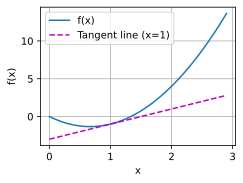

In [50]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

===================================Automatic Differentiation====================================

In [51]:
x = torch.arange(4.0)

x.requires_grad_(True)
x.grad # The gradient is None by default

In [52]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [53]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [54]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [60]:
# Backward for Non-Scalar Variables
x.grad.zero_()
y = (x * x).sum()
y.backward()
y, x.grad

(tensor(14., grad_fn=<SumBackward0>), tensor([0., 2., 4., 6.]))

In [62]:
# Backward for Non-Scalar Variables
x.grad.zero_()
y = x * x

# •	.backward() works only if the tensor is a scalar.
# •	If y is a vector, PyTorch needs a vector of gradients of some scalar w.r.t. y (think chain rule) to compute ∂L/∂x.
# •	Here we use gradient=torch.ones(len(y)) to sum all elements (equivalent to .sum()).

y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward();  sum up the gradients of each component of y with respect to the full vector x,

# y = x * x  # [0., 1., 4., 9.]
# gradient = torch.ones(4)  # dL/dy = [1, 1, 1, 1]
# The chain rule:

# ∂L/∂x = ∂L/∂y * ∂y/∂x. (x.grad[i] = ∂L/∂y[i] * ∂y[i]/∂x[i]. (*: elementwise product)
# 	•	∂y/∂x = 2*x elementwise
# 	•	∂L/∂y = gradient = [1, 1, 1, 1]

# Elementwise multiplication: x.grad = 2*x * 1 = [0, 2, 4, 6]

y, x.grad

(tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>), tensor([0., 2., 4., 6.]))

In [63]:
# Detaching Computation

x.grad.zero_()
y = x * x
u = y.detach() # detach() creates a new tensor with the same data as y, but removes it from the gradient computation graph
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [64]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [65]:
# 📚 UNDERSTANDING .detach(): "BREAKING THE COMPUTATION GRAPH"
print("="*70)
print("🔍 WHAT DOES y.detach() MEAN?")
print("="*70)

# Let's create a step-by-step example
x = torch.arange(4.0, requires_grad=True)
print(f"x = {x}")
print(f"x.requires_grad = {x.requires_grad}")

y = x * x  # y = x²
print(f"\ny = x * x = {y}")
print(f"y.requires_grad = {y.requires_grad}")

# Now detach y
u = y.detach()
print(f"\nu = y.detach() = {u}")
print(f"u.requires_grad = {u.requires_grad}")

print("\n" + "="*50)
print("🎯 KEY CONCEPTS:")
print("="*50)

print("1️⃣ COMPUTATIONAL GRAPH:")
print("   • PyTorch builds a graph: x → y = x² → z = u * x")
print("   • Each operation tracks gradients for backpropagation")

print("\n2️⃣ WHAT .detach() DOES:")
print("   • Creates a NEW tensor with SAME DATA as y")
print("   • Removes the tensor from the computation graph")
print("   • Sets requires_grad = False")
print("   • u and y share the same data, but u has no gradient history")

print("\n3️⃣ WHY USE .detach():")
print("   • Stop gradient flow at a specific point")
print("   • Treat intermediate results as constants")
print("   • Prevent certain operations from affecting gradients")

print("\n4️⃣ THE RESULT:")
print("   • u is treated as a CONSTANT during backpropagation")
print("   • When we compute z = u * x, gradients flow only through x")
print("   • The gradient path x → y is 'broken' at u")

🔍 WHAT DOES y.detach() MEAN?
x = tensor([0., 1., 2., 3.], requires_grad=True)
x.requires_grad = True

y = x * x = tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
y.requires_grad = True

u = y.detach() = tensor([0., 1., 4., 9.])
u.requires_grad = False

🎯 KEY CONCEPTS:
1️⃣ COMPUTATIONAL GRAPH:
   • PyTorch builds a graph: x → y = x² → z = u * x
   • Each operation tracks gradients for backpropagation

2️⃣ WHAT .detach() DOES:
   • Creates a NEW tensor with SAME DATA as y
   • Removes the tensor from the computation graph
   • Sets requires_grad = False
   • u and y share the same data, but u has no gradient history

3️⃣ WHY USE .detach():
   • Stop gradient flow at a specific point
   • Treat intermediate results as constants
   • Prevent certain operations from affecting gradients

4️⃣ THE RESULT:
   • u is treated as a CONSTANT during backpropagation
   • When we compute z = u * x, gradients flow only through x
   • The gradient path x → y is 'broken' at u


In [66]:
print("\n" + "="*60)
print("🔬 COMPARISON: WITH vs WITHOUT .detach()")
print("="*60)

# Example 1: WITHOUT detach (normal gradient flow)
x1 = torch.arange(4.0, requires_grad=True)
y1 = x1 * x1
z1 = y1 * x1  # z = y * x = x² * x = x³

x1.grad = None  # Clear previous gradients
z1.sum().backward()
print("WITHOUT .detach():")
print(f"x1 = {x1.data}")
print(f"y1 = x1² = {y1.data}")
print(f"z1 = y1 * x1 = x1³ = {z1.data}")
print(f"x1.grad = {x1.grad}")
print("Gradient computation: dz/dx = d(x³)/dx = 3x² = 3 * [0, 1, 4, 9]")

print("\n" + "-"*40)

# Example 2: WITH detach (broken gradient flow)
x2 = torch.arange(4.0, requires_grad=True)
y2 = x2 * x2
u2 = y2.detach()  # Detach here!
z2 = u2 * x2      # z = u * x (u is treated as constant)

x2.grad = None  # Clear previous gradients
z2.sum().backward()
print("WITH .detach():")
print(f"x2 = {x2.data}")
print(f"y2 = x2² = {y2.data}")
print(f"u2 = y2.detach() = {u2.data} (same values, no gradients)")
print(f"z2 = u2 * x2 = {z2.data}")
print(f"x2.grad = {x2.grad}")
print("Gradient computation: dz/dx = d(u*x)/dx = u = [0, 1, 4, 9]")
print("Note: u is treated as constant, so gradient is just u")

print("\n🎯 THE DIFFERENCE:")
print("• Without detach: x.grad = 3x² (derivative of x³)")
print("• With detach:    x.grad = u = x² (u treated as constant)")
print("• detach() 'freezes' the values but stops gradient flow")


🔬 COMPARISON: WITH vs WITHOUT .detach()
WITHOUT .detach():
x1 = tensor([0., 1., 2., 3.])
y1 = x1² = tensor([0., 1., 4., 9.])
z1 = y1 * x1 = x1³ = tensor([ 0.,  1.,  8., 27.])
x1.grad = tensor([ 0.,  3., 12., 27.])
Gradient computation: dz/dx = d(x³)/dx = 3x² = 3 * [0, 1, 4, 9]

----------------------------------------
WITH .detach():
x2 = tensor([0., 1., 2., 3.])
y2 = x2² = tensor([0., 1., 4., 9.])
u2 = y2.detach() = tensor([0., 1., 4., 9.]) (same values, no gradients)
z2 = u2 * x2 = tensor([ 0.,  1.,  8., 27.])
x2.grad = tensor([0., 1., 4., 9.])
Gradient computation: dz/dx = d(u*x)/dx = u = [0, 1, 4, 9]
Note: u is treated as constant, so gradient is just u

🎯 THE DIFFERENCE:
• Without detach: x.grad = 3x² (derivative of x³)
• With detach:    x.grad = u = x² (u treated as constant)
• detach() 'freezes' the values but stops gradient flow


In [ ]:
# One benefit of using automatic differentiation is that even if building the computational graph of (a function required passing through a maze of 
# Python control flow) (e.g., conditionals, loops, and arbitrary function calls), (we can still calculate the gradient of the resulting variable.)

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a


tensor(True)

=======================================Probability and Statistics====================================

In [69]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [70]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [48, 52]


In [74]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100000, fair_probs).sample()

tensor([50040., 49960.])

In [75]:
counts = Multinomial(1, fair_probs).sample((10000,))
counts

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [80]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[1.0000e+00, 0.0000e+00],
        [2.0000e+00, 0.0000e+00],
        [3.0000e+00, 0.0000e+00],
        ...,
        [5.0430e+03, 4.9550e+03],
        [5.0430e+03, 4.9560e+03],
        [5.0430e+03, 4.9570e+03]])

In [ ]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
estimates

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.5044009 , 0.49559912],
       [0.5043504 , 0.49564958],
       [0.5043    , 0.4957    ]], dtype=float32)

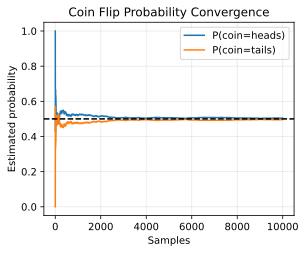

In [ ]:
# Create the probability convergence plot
plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label="P(coin=heads)")
plt.plot(estimates[:, 1], label="P(coin=tails)")
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.xlabel('Samples')
plt.ylabel('Estimated probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Coin Flip Probability Convergence')
plt.show()

In [ ]:
# fair_probs = torch.tensor([0.5, 0.5])
print("Method 1: Multinomial(100000, fair_probs).sample()")
print("Method 2: Multinomial(1, fair_probs).sample((10000,))")

print("1. EXPERIMENT STRUCTURE:")
print("   Method 1: ONE big experiment (100,000 flips)")
print("   Method 2: Many small experiments (10,000 * 1 flip each)")

print("2. OUTPUT FORMAT:")
print("   Method 1: Single vector [total_heads, total_tails]")
print("   Method 2: Matrix where each row is one coin flip result")

print("3. INFORMATION CONTENT:")
print("   Method 1: Only final totals (aggregated result)")
print("   Method 2: Individual flip results (detailed history)")

print("4. USE CASES:")
print("   Method 1: When you only need final statistics")
print("   Method 2: When you need to analyze the process over time")


🎯 KEY DIFFERENCES SUMMARY:

1️⃣ EXPERIMENT STRUCTURE:
   Method 1: ONE big experiment (100,000 flips)
   Method 2: Many small experiments (10,000 × 1 flip each)

2️⃣ OUTPUT FORMAT:
   Method 1: Single vector [total_heads, total_tails]
   Method 2: Matrix where each row is one coin flip result

3️⃣ INFORMATION CONTENT:
   Method 1: Only final totals (aggregated result)
   Method 2: Individual flip results (detailed history)

4️⃣ USE CASES:
   Method 1: When you only need final statistics
   Method 2: When you need to analyze the process over time

💡 ANALOGY:
Method 1: 'Tell me the final score of 100,000 coin flips'
Method 2: 'Give me the result of each individual coin flip (10,000 times)'

🔄 RELATIONSHIP:
method2.sum(dim=0) ≈ method1 (if same total number of flips)
Method 1 total flips: 100000.0
Method 2 total flips: 10000.0
They're different experiments, so results will vary!


In [ ]:
# UNDERSTANDING COVARIANCE MATRIX: "How Variables Dance Together"
print("="*80)
print("🎯 WHAT IS A COVARIANCE MATRIX?")
print("="*80)

print("🔍 DEFINITION:")
print("A covariance matrix measures how different variables change together.")
print("• Diagonal elements: Variance of each variable (spread)")
print("• Off-diagonal elements: Covariance between pairs of variables (relationship)")

print("\n📊 MATHEMATICAL FORM:")
print("For variables X₁, X₂, ..., Xₙ, the covariance matrix C is:")
print("    ┌                           ┐")
print("    │ Var(X₁)   Cov(X₁,X₂) ... │")
print("C = │ Cov(X₂,X₁) Var(X₂)  ... │")
print("    │    ...       ...     ... │")
print("    └                           ┘")

print("\n💡 KEY INSIGHTS:")
print("• Symmetric: C[i,j] = C[j,i]")
print("• Diagonal = variance (how much each variable spreads)")
print("• Off-diagonal = covariance (how variables move together)")

import torch
import numpy as np
import matplotlib.pyplot as plt

# Create sample data to demonstrate
torch.manual_seed(42)  # For reproducible results
n_samples = 1000

print("\n" + "="*60)
print("🔬 PRACTICAL EXAMPLE: Height, Weight, and Age Data")
print("="*60)

🎯 WHAT IS A COVARIANCE MATRIX?
🔍 DEFINITION:
A covariance matrix measures how different variables change together.
• Diagonal elements: Variance of each variable (spread)
• Off-diagonal elements: Covariance between pairs of variables (relationship)

📊 MATHEMATICAL FORM:
For variables X₁, X₂, ..., Xₙ, the covariance matrix C is:
    ┌                           ┐
    │ Var(X₁)   Cov(X₁,X₂) ... │
C = │ Cov(X₂,X₁) Var(X₂)  ... │
    │    ...       ...     ... │
    └                           ┘

💡 KEY INSIGHTS:
• Symmetric: C[i,j] = C[j,i]
• Diagonal = variance (how much each variable spreads)
• Off-diagonal = covariance (how variables move together)

🔬 PRACTICAL EXAMPLE: Height, Weight, and Age Data


In [ ]:
# Generate correlated data to show relationships
# Let's simulate: Height, Weight, Age for 1000 people

# Start with independent random variables
height_base = torch.randn(n_samples) * 10 + 170  # Average 170cm, std 10cm
age = torch.randint(18, 70, (n_samples,)).float()  # Age between 18-70

# Make weight correlated with height (taller people tend to be heavier)
weight = 2.5 * height_base + torch.randn(n_samples) * 15 + (-250)  # Some correlation + noise

# Stack into data matrix (each column is a variable)
data = torch.stack([height_base, weight, age], dim=1)
print(f"Data shape: {data.shape}")
print(f"Variables: [Height(cm), Weight(kg), Age(years)]")

print(f"\nFirst 5 samples:")
for i in range(5):
    print(f"Person {i+1}: Height={data[i,0]:.1f}cm, Weight={data[i,1]:.1f}kg, Age={data[i,2]:.0f}years")

print(f"\nData statistics:")
print(f"Height - Mean: {data[:,0].mean():.1f}, Std: {data[:,0].std():.1f}")
print(f"Weight - Mean: {data[:,1].mean():.1f}, Std: {data[:,1].std():.1f}")
print(f"Age    - Mean: {data[:,2].mean():.1f}, Std: {data[:,2].std():.1f}")

Data shape: torch.Size([1000, 3])
Variables: [Height(cm), Weight(kg), Age(years)]

First 5 samples:
Person 1: Height=189.3cm, Weight=208.8kg, Age=43years
Person 2: Height=184.9cm, Weight=200.5kg, Age=48years
Person 3: Height=179.0cm, Weight=207.9kg, Age=69years
Person 4: Height=148.9cm, Weight=115.8kg, Age=42years
Person 5: Height=176.8cm, Weight=177.2kg, Age=60years

Data statistics:
Height - Mean: 170.0, Std: 10.0
Weight - Mean: 175.3, Std: 29.5
Age    - Mean: 43.0, Std: 15.3


In [ ]:
# 📊 COMPUTING THE COVARIANCE MATRIX
print("\n" + "="*60)
print("🧮 CALCULATING COVARIANCE MATRIX")
print("="*60)

# Method 1: Manual calculation (educational)
print("📝 METHOD 1: Manual calculation")

# Center the data (subtract mean from each variable)
data_centered = data - data.mean(dim=0)
print(f"Centered data shape: {data_centered.shape}")

# Covariance matrix = (X^T @ X) / (n-1)
cov_matrix_manual = (data_centered.T @ data_centered) / (n_samples - 1)
print(f"\nCovariance Matrix (manual calculation):")
print(cov_matrix_manual)

print(f"\n🔍 INTERPRETING THE MATRIX:")
print(f"[0,0] = Variance of Height = {cov_matrix_manual[0,0]:.2f}")
print(f"[1,1] = Variance of Weight = {cov_matrix_manual[1,1]:.2f}")  
print(f"[2,2] = Variance of Age = {cov_matrix_manual[2,2]:.2f}")
print(f"[0,1] = Covariance(Height,Weight) = {cov_matrix_manual[0,1]:.2f}")
print(f"[0,2] = Covariance(Height,Age) = {cov_matrix_manual[0,2]:.2f}")
print(f"[1,2] = Covariance(Weight,Age) = {cov_matrix_manual[1,2]:.2f}")

# Method 2: Using NumPy (built-in function)
print(f"\n📝 METHOD 2: Using NumPy's built-in function")
data_np = data.numpy()
cov_matrix_numpy = np.cov(data_np.T)  # Note: transpose needed for np.cov
print(f"Covariance Matrix (NumPy):")
print(cov_matrix_numpy)

print(f"\n✅ VERIFICATION: Manual vs NumPy")
print(f"Matrices are close: {torch.allclose(cov_matrix_manual, torch.tensor(cov_matrix_numpy, dtype=torch.float32))}")


🧮 CALCULATING COVARIANCE MATRIX
📝 METHOD 1: Manual calculation
Centered data shape: torch.Size([1000, 3])

Covariance Matrix (manual calculation):
tensor([[ 1.0069e+02,  2.5523e+02, -4.5648e-01],
        [ 2.5523e+02,  8.7283e+02, -3.3532e+00],
        [-4.5648e-01, -3.3532e+00,  2.3311e+02]])

🔍 INTERPRETING THE MATRIX:
[0,0] = Variance of Height = 100.69
[1,1] = Variance of Weight = 872.83
[2,2] = Variance of Age = 233.11
[0,1] = Covariance(Height,Weight) = 255.23
[0,2] = Covariance(Height,Age) = -0.46
[1,2] = Covariance(Weight,Age) = -3.35

📝 METHOD 2: Using NumPy's built-in function
Covariance Matrix (NumPy):
[[ 1.00693431e+02  2.55229377e+02 -4.56483287e-01]
 [ 2.55229377e+02  8.72828428e+02 -3.35317601e+00]
 [-4.56483287e-01 -3.35317601e+00  2.33115490e+02]]

✅ VERIFICATION: Manual vs NumPy
Matrices are close: True


In [ ]:
# 🎯 UNDERSTANDING COVARIANCE VALUES
print("\n" + "="*70)
print("🔍 WHAT DO THE COVARIANCE VALUES MEAN?")
print("="*70)

cov_hw = cov_matrix_manual[0,1].item()  # Height-Weight covariance
cov_ha = cov_matrix_manual[0,2].item()  # Height-Age covariance  
cov_wa = cov_matrix_manual[1,2].item()  # Weight-Age covariance

print("📊 COVARIANCE INTERPRETATION:")
print(f"Height-Weight covariance: {cov_hw:.2f}")
if cov_hw > 0:
    print("   ✅ POSITIVE: As height increases, weight tends to increase")
elif cov_hw < 0:
    print("   ❌ NEGATIVE: As height increases, weight tends to decrease")
else:
    print("   ⚪ ZERO: No linear relationship")

print(f"\nHeight-Age covariance: {cov_ha:.2f}")
if abs(cov_ha) < 10:
    print("   ⚪ NEAR ZERO: Little to no linear relationship (as expected)")

print(f"\nWeight-Age covariance: {cov_wa:.2f}")
if abs(cov_wa) < 20:
    print("   ⚪ NEAR ZERO: Little to no linear relationship (as expected)")

print("\n💡 MAGNITUDE INTERPRETATION:")
print("• Large positive: Strong positive relationship")
print("• Large negative: Strong negative relationship") 
print("• Near zero: Weak/no linear relationship")
print("• Magnitude depends on units! (cm×kg vs m×g gives different values)")

print("\n🎯 KEY INSIGHT:")
print("Covariance magnitude is hard to interpret because it depends on units.")
print("That's why we often use CORRELATION instead (normalized covariance).")


🔍 WHAT DO THE COVARIANCE VALUES MEAN?
📊 COVARIANCE INTERPRETATION:
Height-Weight covariance: 255.23
   ✅ POSITIVE: As height increases, weight tends to increase

Height-Age covariance: -0.46
   ⚪ NEAR ZERO: Little to no linear relationship (as expected)

Weight-Age covariance: -3.35
   ⚪ NEAR ZERO: Little to no linear relationship (as expected)

💡 MAGNITUDE INTERPRETATION:
• Large positive: Strong positive relationship
• Large negative: Strong negative relationship
• Near zero: Weak/no linear relationship
• Magnitude depends on units! (cm×kg vs m×g gives different values)

🎯 KEY INSIGHT:
Covariance magnitude is hard to interpret because it depends on units.
That's why we often use CORRELATION instead (normalized covariance).


In [ ]:
# 📈 CORRELATION MATRIX: The Normalized Version
print("\n" + "="*70)
print("🎯 FROM COVARIANCE TO CORRELATION")
print("="*70)

# Calculate correlation matrix: Corr(X,Y) = Cov(X,Y) / (std(X) * std(Y))
std_devs = torch.sqrt(torch.diag(cov_matrix_manual))  # Standard deviations
print(f"Standard deviations: {std_devs}")

# Create correlation matrix
correlation_matrix = torch.zeros_like(cov_matrix_manual)
for i in range(3):
    for j in range(3):
        correlation_matrix[i,j] = cov_matrix_manual[i,j] / (std_devs[i] * std_devs[j])

print(f"\nCorrelation Matrix:")
print(correlation_matrix)

print(f"\n🔍 INTERPRETING CORRELATIONS:")
print(f"Height-Weight correlation: {correlation_matrix[0,1]:.3f}")
if correlation_matrix[0,1] > 0.7:
    print("   💪 STRONG positive correlation")
elif correlation_matrix[0,1] > 0.3:
    print("   👍 MODERATE positive correlation")
elif correlation_matrix[0,1] > 0:
    print("   🤏 WEAK positive correlation")

print(f"Height-Age correlation: {correlation_matrix[0,2]:.3f}")
print(f"Weight-Age correlation: {correlation_matrix[1,2]:.3f}")

print(f"\n📊 CORRELATION RANGE:")
print("• Correlation values always range from -1 to +1")
print("• +1: Perfect positive correlation")
print("• -1: Perfect negative correlation")  
print("• 0: No linear correlation")
print("• Unlike covariance, correlation is unit-free!")


🎯 FROM COVARIANCE TO CORRELATION
Standard deviations: tensor([10.0346, 29.5437, 15.2681])

Correlation Matrix:
tensor([[ 1.0000,  0.8609, -0.0030],
        [ 0.8609,  1.0000, -0.0074],
        [-0.0030, -0.0074,  1.0000]])

🔍 INTERPRETING CORRELATIONS:
Height-Weight correlation: 0.861
   💪 STRONG positive correlation
Height-Age correlation: -0.003
Weight-Age correlation: -0.007

📊 CORRELATION RANGE:
• Correlation values always range from -1 to +1
• +1: Perfect positive correlation
• -1: Perfect negative correlation
• 0: No linear correlation
• Unlike covariance, correlation is unit-free!



📊 VISUAL REPRESENTATION


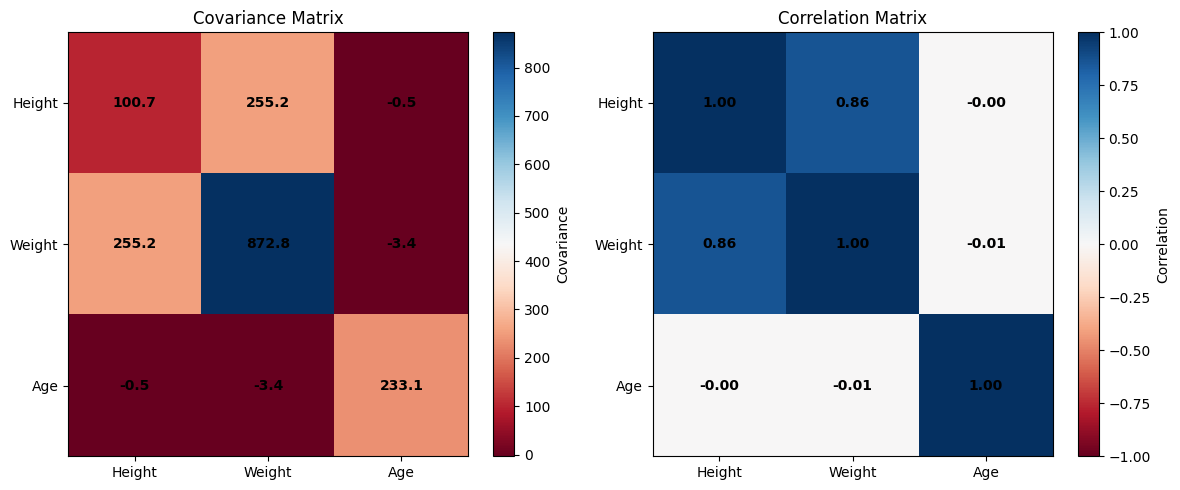

🔍 VISUAL INTERPRETATION:
• Darker red: Strong positive relationship
• Darker blue: Strong negative relationship
• White/light: Weak relationship
• Diagonal is always strongest (variable with itself)


In [ ]:
# 🎨 VISUALIZING THE COVARIANCE MATRIX
print("\n" + "="*70)
print("📊 VISUAL REPRESENTATION")
print("="*70)

# Create a heatmap to visualize the covariance matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Covariance Matrix Heatmap
im1 = ax1.imshow(cov_matrix_manual.numpy(), cmap='RdBu', aspect='auto')
ax1.set_title('Covariance Matrix')
ax1.set_xticks([0, 1, 2])
ax1.set_yticks([0, 1, 2])
ax1.set_xticklabels(['Height', 'Weight', 'Age'])
ax1.set_yticklabels(['Height', 'Weight', 'Age'])

# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax1.text(j, i, f'{cov_matrix_manual[i, j]:.1f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im1, ax=ax1, label='Covariance')

# Plot 2: Correlation Matrix Heatmap  
im2 = ax2.imshow(correlation_matrix.numpy(), cmap='RdBu', vmin=-1, vmax=1, aspect='auto')
ax2.set_title('Correlation Matrix')
ax2.set_xticks([0, 1, 2])
ax2.set_yticks([0, 1, 2])
ax2.set_xticklabels(['Height', 'Weight', 'Age'])
ax2.set_yticklabels(['Height', 'Weight', 'Age'])

# Add text annotations
for i in range(3):
    for j in range(3):
        text = ax2.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im2, ax=ax2, label='Correlation')

plt.tight_layout()
plt.show()

print("🔍 VISUAL INTERPRETATION:")
print("• Darker red: Strong positive relationship")
print("• Darker blue: Strong negative relationship")
print("• White/light: Weak relationship")
print("• Diagonal is always strongest (variable with itself)")

In [ ]:
# 🎯 REAL-WORLD APPLICATIONS OF COVARIANCE MATRICES
print("\n" + "="*80)
print("🌍 WHERE ARE COVARIANCE MATRICES USED?")
print("="*80)

print("1️⃣ MACHINE LEARNING:")
print("   • Principal Component Analysis (PCA) - dimensionality reduction")
print("   • Gaussian distributions - modeling data probability")
print("   • Feature correlation analysis - understanding relationships")

print("\n2️⃣ FINANCE:")
print("   • Portfolio optimization - balancing risk and return")
print("   • Risk management - understanding asset correlations")
print("   • Market analysis - how stocks move together")

print("\n3️⃣ STATISTICS:")
print("   • Multivariate analysis - studying multiple variables")
print("   • Hypothesis testing - comparing groups of variables")
print("   • Regression analysis - understanding variable relationships")

print("\n4️⃣ COMPUTER VISION:")
print("   • Image processing - pixel correlation patterns")
print("   • Feature detection - understanding visual relationships")
print("   • Pattern recognition - identifying similar structures")

print("\n5️⃣ SIGNAL PROCESSING:")
print("   • Noise reduction - understanding signal correlations")
print("   • Data compression - removing redundant information")
print("   • Communication systems - optimizing data transmission")

print("\n🔑 KEY TAKEAWAY:")
print("Covariance matrices help us understand how multiple variables")
print("relate to each other, which is fundamental in data science!")


🌍 WHERE ARE COVARIANCE MATRICES USED?
1️⃣ MACHINE LEARNING:
   • Principal Component Analysis (PCA) - dimensionality reduction
   • Gaussian distributions - modeling data probability
   • Feature correlation analysis - understanding relationships

2️⃣ FINANCE:
   • Portfolio optimization - balancing risk and return
   • Risk management - understanding asset correlations
   • Market analysis - how stocks move together

3️⃣ STATISTICS:
   • Multivariate analysis - studying multiple variables
   • Hypothesis testing - comparing groups of variables
   • Regression analysis - understanding variable relationships

4️⃣ COMPUTER VISION:
   • Image processing - pixel correlation patterns
   • Feature detection - understanding visual relationships
   • Pattern recognition - identifying similar structures

5️⃣ SIGNAL PROCESSING:
   • Noise reduction - understanding signal correlations
   • Data compression - removing redundant information
   • Communication systems - optimizing data transmission

### =======================loopup-api.md====================================

In [ ]:
# https://docs.pytorch.org/docs/stable/index.html

In [ ]:
# To know which functions and classes can be called in a module
print(dir(torch.distributions))


['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'GeneralizedPareto', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'T

In [ ]:
help(torch.ones)


Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.

    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.

    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the curre